In [36]:
# Jupyter Notebook - Calculate Optimal Fluorescence Lifetime for Fluorescence Polarization system
# Gage Leighton - 2021-12-18

# Very simple and "inacurate" script to calculate optimal fluorescence lifetime for a system in equilibrium
# Change the un/bound mass to match your system. Optimal for systems of 7.2 to 21.9 KDa
Unbound_mw = 2400 # Weight in daltons
Bound_mw = 7800
temp = 293.15 # Used to calculate viscosity

0.0010017487594089526


In [37]:
# Import necessary python packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import constants
import numpy as np

In [41]:
# Convert system mass (Da) into Rotational Correlation Time (ns)
# Alternatively, use this website to calculate rotational correlation times for unbound and bound states
# http://nickanthis.com/tools/tau
def newda2rct(x):
    return (0.0005998 * x + 0.1674) * 1e-9

# Convert fluorophore tau and rotational correlation time to polarization
# https://www.thermofisher.com/us/en/home/references/molecular-probes-the-handbook/technical-notes-and-product-highlights/fluorescence-polarization-fp.html
def polarization(tau, phi):
    return (1.666666*(1+tau/phi)+1/3)**(-1)

# Determine data maximum and construct matplotlib annotation.
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(1,1.1), **kw)

# Calculate viscosity from temp. Not used in current code version.
viscosity = 2.414e-5 * 10**(247.8/(temp-140))

In [54]:
# Fluorescence molecule lifetimes to test
tau_min = 0.1e-9 # Minimum fluorescence lifetime to calculate (>0)
tau_max = 5e-9 # Max fluorescence lifetime
x_points = 100
tau = np.arange(tau_min, tau_max, (tau_max-tau_min)/x_points, dtype=float)

# Calculate RCT in ns for bound and unbound states
rct_un = newda2rct(Unbound_mw)
rct_bound = newda2rct(Bound_mw)
print(rct_un,rct_bound)

# Calculate relative polarization and take difference between states
y = np.array(polarization(tau,rct_bound)) - np.array(polarization(tau,rct_un))

# print(np.c_[tau*1e9,y])

1.6069200000000003e-09 4.84584e-09
[[0.1        0.01619807]
 [0.149      0.0233722 ]
 [0.198      0.03009537]
 [0.247      0.0364009 ]
 [0.296      0.04231909]
 [0.345      0.04787755]
 [0.394      0.05310147]
 [0.443      0.05801389]
 [0.492      0.06263591]
 [0.541      0.0669869 ]
 [0.59       0.07108464]
 [0.639      0.07494552]
 [0.688      0.07858462]
 [0.737      0.08201587]
 [0.786      0.08525216]
 [0.835      0.0883054 ]
 [0.884      0.09118662]
 [0.933      0.09390607]
 [0.982      0.09647326]
 [1.031      0.09889704]
 [1.08       0.10118564]
 [1.129      0.10334672]
 [1.178      0.10538745]
 [1.227      0.10731451]
 [1.276      0.10913413]
 [1.325      0.11085215]
 [1.374      0.11247405]
 [1.423      0.11400493]
 [1.472      0.1154496 ]
 [1.521      0.11681256]
 [1.57       0.11809805]
 [1.619      0.11931005]
 [1.668      0.12045229]
 [1.717      0.12152829]
 [1.766      0.12254137]
 [1.815      0.12349465]
 [1.864      0.12439108]
 [1.913      0.12523345]
 [1.962      0.

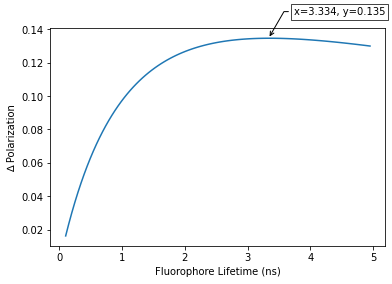

In [53]:
f, ax = plt.subplots(1)
x = tau*1e9
ax.plot(x,y)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(-9,-9))
plt.xlabel("Fluorophore Lifetime (ns)")
plt.ylabel("∆ Polarization")
annot_max(x,y,ax)
# f.savefig("Test.png")

In [ ]:
# Potentially useful reading

# https://biologicalproceduresonline.biomedcentral.com/track/pdf/10.1007/s12575-009-9008-x.pdf